## Exploration and Cross-Correlation with the REFLEX catalog

In [10]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
import skymapper as skm
from code.plot_utils import plot_pretty
from astropy import units as u
from astropy.coordinates import SkyCoord
from matplotlib import rcParams
rcParams['font.family'] = 'serif'

%matplotlib inline
%pylab inline

# Adjust rc parameters to make plots pretty
def plot_pretty(dpi=200, fontsize=9):
    
    import matplotlib.pyplot as plt

    plt.rc("savefig", dpi=dpi)       # dpi resolution of saved image files
    # if you have LaTeX installed on your laptop, uncomment the line below for prettier labels
    #plt.rc('text', usetex=True)      # use LaTeX to process labels
    plt.rc('font', size=fontsize)    # fontsize
    plt.rc('xtick', direction='in')  # make axes ticks point inward
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=10) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=10) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1]) # fix dotted lines

    return

plot_pretty()
#plot_pretty() 

Populating the interactive namespace from numpy and matplotlib


#### Import the REFLEX catalog

Get RA/DEC of the Reflex catalog

Note that RA is in hour/minute/second format and DEC in degree minute second format

In [11]:
RAh, RAm, RAs, DECd,DECm, DECs = np.loadtxt("Reflex_RADEC.dat",  unpack=3, usecols=[1,2,3,4,5,6])

print(len(RAh))

447


Now I have to convert everything in degrees

The conversion is:

For DEC:

DEC (degrees) = DEcd + DEcm/60 + DEcs/3600

RA (degrees) = RAh$ \times 15$ + RAm/4 + RAs/240

See wiki or SDSS site for the explanation why the conversion to degrees is different for DEC and for RA.

In [12]:
RA_reflex = RAh*15.0 + RAm/4.0 + RAs/240.0  # Right ascension in degrees 

# Get signs 
sig = np.sign(DECd)
sig[32]=sig[104]=sig[245]=sig[288]=sig[436]=1
sig[174]=sig[175]=sig[272]=sig[289]=-1

DEC_reflex = sig*(abs(DECd) + DECm/60.0 + DECs/3600.0)

Now, let's plot them in RA and DEC to see the distribution of the galaxy clusters

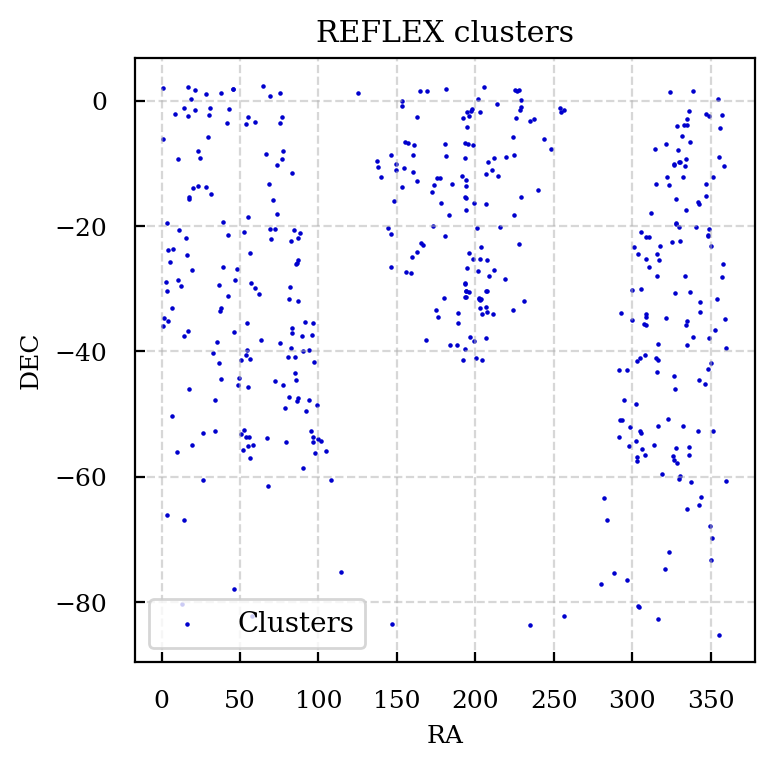

In [19]:
fig = plt.figure(figsize=(4.0,4.0))

plt.scatter(RA_reflex, DEC_reflex, c='mediumblue', s=0.4, label='Clusters')

plt.xlabel('RA'); plt.ylabel('DEC')
plt.grid(ls='--',alpha=0.5)
plt.legend(frameon=True, loc='lower left', fontsize=10)
plt.title('REFLEX clusters')
plt.show()

Let's see how many clusters we have in the $20^0 \times 20^0$ region around fornax

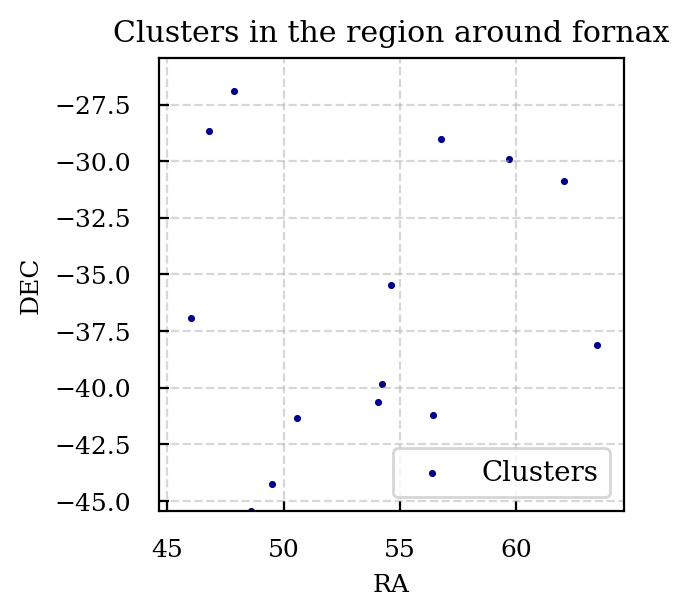

In [26]:
fig = plt.figure(figsize=(3.0,3.0))

plt.scatter(RA_reflex, DEC_reflex, c='darkblue', s=2.4, label='Clusters')

plt.xlabel('RA'); plt.ylabel('DEC')
plt.grid(ls='--',alpha=0.5)
plt.legend(frameon=True, loc='lower right', fontsize=10)
plt.xlim(44.61625,64.61625)
plt.ylim(-45.44833,-25.44833)
plt.title('Clusters in the region around fornax')
plt.show()

Ok, we have just 13 (or fourteen, there is one down there) clusters, but we can attempt to calculate the cross correlation function between LSB/UDG candidates and the clusters in that region 

In [30]:
# Select the clusters in that region

cuts = (RA_reflex>44.61625)&(RA_reflex<64.61625)&(DEC_reflex>-45.44833)&(DEC_reflex<-25.44833)

#RA, DEC in the region around fornax
RA_refl_forn = RA_reflex[cuts]
DEC_refl_forn = DEC_reflex[cuts]

print(len(RA_refl_forn))

14
